In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
import numpy as np
import statsmodels.api as sm

df = pd.read_csv("../data/WHO-SIMPLE.csv")

In [2]:
#Examine data frame and determine which year has the most complete data set
df.head()
df.describe()

df2 = df
#df2 = df2.set_index(['Year'])

df2.groupby(['Year']).count()
df2.groupby(['Year']).count().sum(axis=1)

Year
1960.0     409
1961.0     410
1962.0     424
1963.0     433
1964.0     447
1965.0     464
1966.0     469
1967.0     486
1968.0     501
1969.0     519
1970.0     530
1971.0     546
1972.0     561
1973.0     561
1974.0     573
1975.0     590
1976.0     599
1977.0     602
1978.0     617
1979.0     621
1980.0    1014
1981.0    1142
1982.0    1198
1983.0    1254
1984.0    1300
1985.0    1391
1986.0    1428
1987.0    1485
1988.0    1469
1989.0    1474
1990.0    1505
1991.0    1542
1992.0    1656
1993.0    1681
1994.0    1676
1995.0    1752
1996.0    1777
1997.0    1720
1998.0    1782
1999.0    1820
2000.0    2949
2001.0    2656
2002.0    2712
2003.0    2752
2004.0    3094
2005.0    2963
2006.0    2928
2007.0    3152
2008.0    2906
2009.0    2958
2010.0    3633
2011.0    3038
2012.0    3529
2013.0    3099
2014.0    3502
2015.0    3260
2016.0    3348
2017.0    2853
2018.0    2920
2019.0    2382
dtype: int64

In [3]:
#Check columns left out
df2.groupby(['Year']).count().filter(['WHS9_85'])

,WHS9_85
Year,
1960.0,0
1961.0,0
1962.0,0
1963.0,0
1964.0,0
1965.0,0
1966.0,0
1967.0,0
1968.0,0


In [4]:
#Attempted filtering to 2016 and examined counts for different variables
df_2016 = df[df['Year'] == 2016]
df_2016.count()

Country_Year                     191
MDG_0000000001                   191
PCV3                             128
ROTAC                             84
WHS4_100                         191
WHS4_117                         182
WHS4_129                         188
WHS4_543                         153
WHS4_544                         191
WHS8_110                         191
MCV2                             160
NUTRITION_564                      0
WHS4_128                         105
LBW_NUMBER                         0
LBW_PREVALENCE                     0
NUTRITION_HA_2                    19
NUTRITION_WA_2                    18
NUTRITION_WH2                     18
NUTRITION_WH_2                    18
WHOSIS_000005                      0
WHOSIS_000006                     14
MDG_0000000026                   182
WHS9_95                          182
WHS_PBR                            0
WSH_2                              0
WSH_3                              0
WSH_SANITATION_SAFELY_MANAGED     88
M

In [5]:
#Examined 2014 and determined it has a more complete set of counts
df_2014 = df[df['Year'] == 2014]
df_2014.count()

Country_Year                     191
MDG_0000000001                   191
PCV3                             104
ROTAC                             67
WHS4_100                         191
WHS4_117                         181
WHS4_129                         186
WHS4_543                         154
WHS4_544                         191
WHS8_110                         191
MCV2                             147
NUTRITION_564                     25
WHS4_128                         105
LBW_NUMBER                       144
LBW_PREVALENCE                   144
NUTRITION_HA_2                    34
NUTRITION_WA_2                    33
NUTRITION_WH2                     32
NUTRITION_WH_2                    33
WHOSIS_000005                      0
WHOSIS_000006                     31
MDG_0000000026                   182
WHS9_95                            0
WHS_PBR                            0
WSH_2                              0
WSH_3                              0
WSH_SANITATION_SAFELY_MANAGED     88
M

In [6]:
#Examined 2010 and determined it has a more complete set of counts
df_2010 = df[df['Year'] == 2010]
df_2010.count()

Country_Year                     191
MDG_0000000001                   191
PCV3                              44
ROTAC                             26
WHS4_100                         190
WHS4_117                         176
WHS4_129                         162
WHS4_543                         155
WHS4_544                         190
WHS8_110                         190
MCV2                             123
NUTRITION_564                     23
WHS4_128                         104
LBW_NUMBER                       144
LBW_PREVALENCE                   144
NUTRITION_HA_2                    24
NUTRITION_WA_2                    24
NUTRITION_WH2                     24
NUTRITION_WH_2                    24
WHOSIS_000005                      9
WHOSIS_000006                     35
MDG_0000000026                   182
WHS9_95                            0
WHS_PBR                          182
WSH_2                              0
WSH_3                              0
WSH_SANITATION_SAFELY_MANAGED     88
M

In [7]:
#Examined 2012 and determined it has a more complete set of counts
df_2012 = df[df['Year'] == 2012]
df_2012.count()

Country_Year                     191
MDG_0000000001                   191
PCV3                              75
ROTAC                             38
WHS4_100                         191
WHS4_117                         178
WHS4_129                         175
WHS4_543                         156
WHS4_544                         191
WHS8_110                         191
MCV2                             133
NUTRITION_564                     22
WHS4_128                         105
LBW_NUMBER                       144
LBW_PREVALENCE                   144
NUTRITION_HA_2                    30
NUTRITION_WA_2                    30
NUTRITION_WH2                     29
NUTRITION_WH_2                    30
WHOSIS_000005                      0
WHOSIS_000006                     29
MDG_0000000026                   182
WHS9_95                            0
WHS_PBR                            0
WSH_2                              0
WSH_3                              0
WSH_SANITATION_SAFELY_MANAGED     88
M

In [8]:
def scatterplot_2vars(df, x, y):
    plt.scatter(df[x], df[y], color='green')
    plt.title('{} Vs {}'.format(x,y), fontsize=14)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    plt.grid(True)
    plt.show()

def histogram(df, x):
    plt.hist(df[x], bins="auto", range=(0,df[x].max()))
    plt.title('{}'.format(x), fontsize=14)
    plt.xlabel(x, fontsize=14)
    plt.grid(True)
    plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


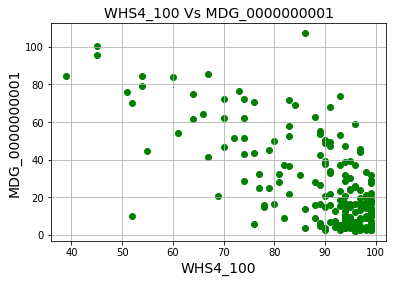

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\lib\function_base.py:697: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\lib\function_base.py:698: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


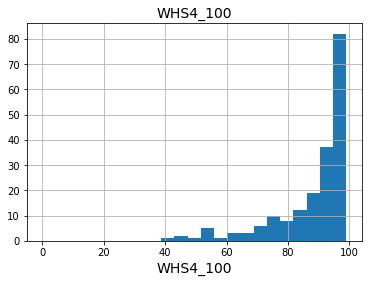

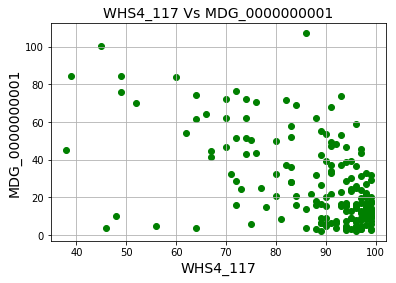

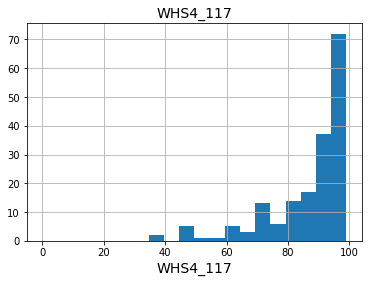

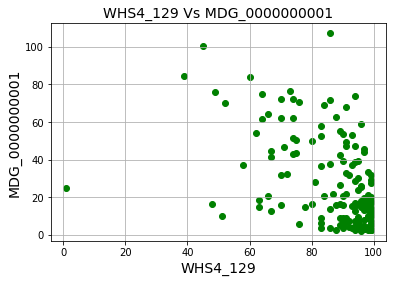

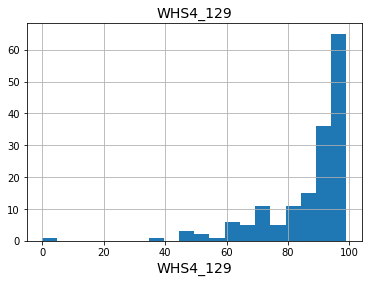

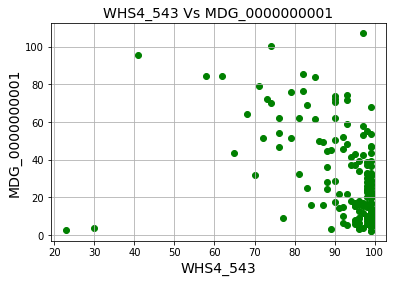

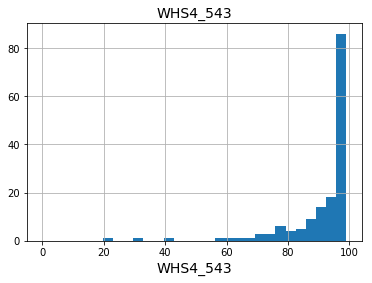

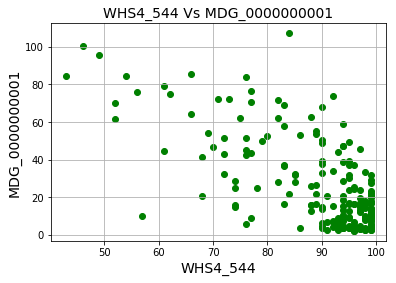

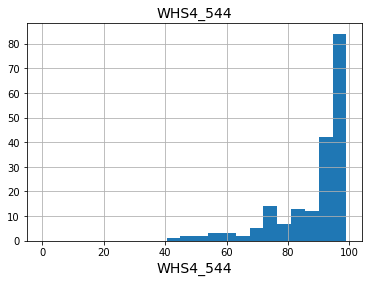

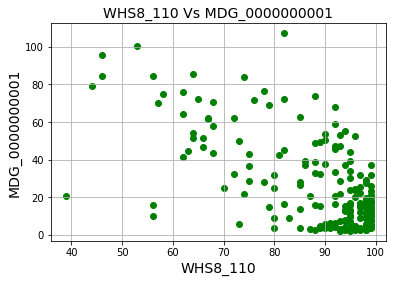

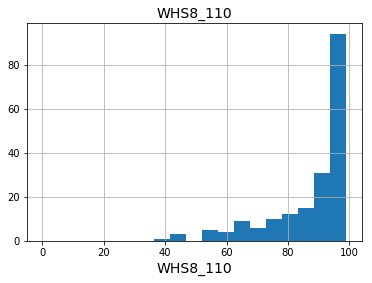

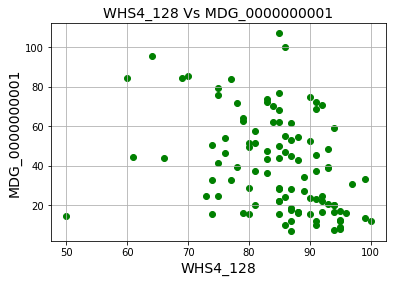

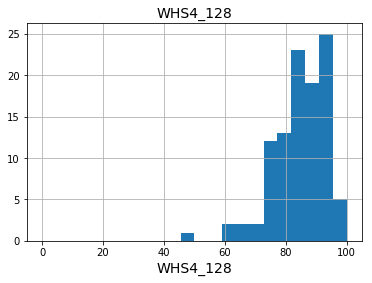

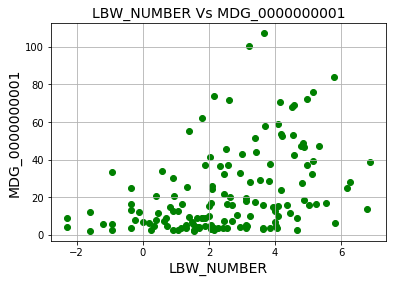

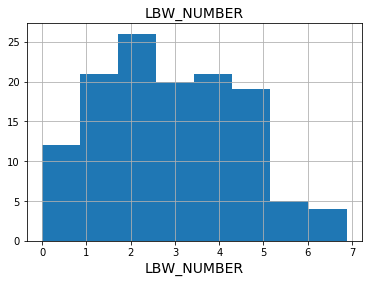

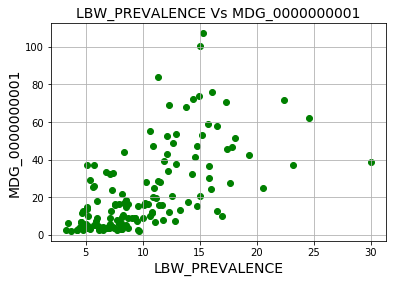

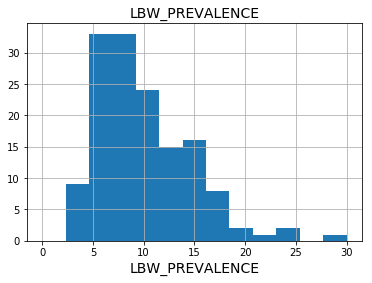

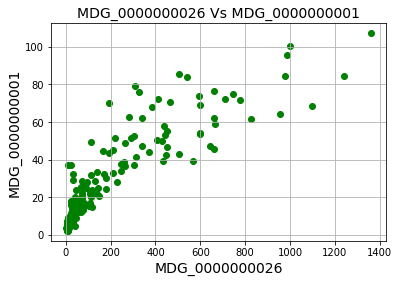

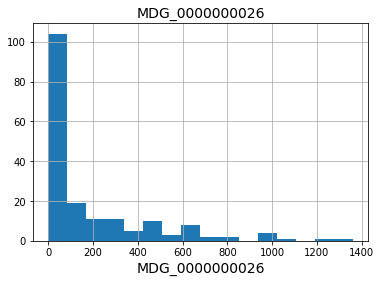

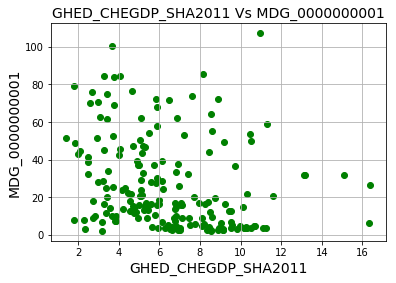

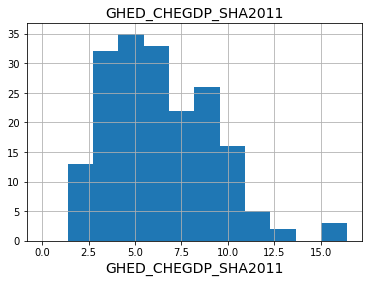

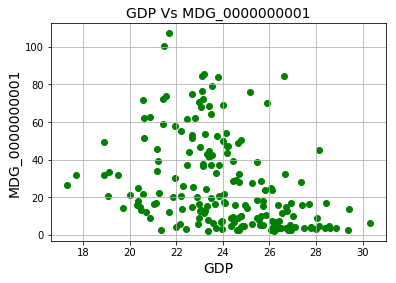

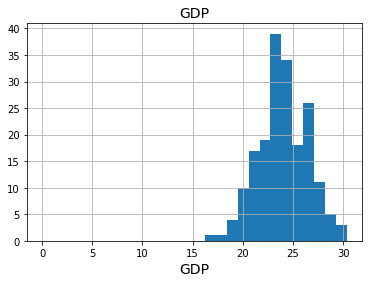

In [9]:
#This is to examine if the relationships are linear. Not all are, but many are good! A few may need a 
# transformation (ie GDP) and a few may not work ultimately
columns_of_interest = ['WHS4_100','WHS4_117','WHS4_129','WHS4_543','WHS4_544','WHS8_110',
                       #'PCV3',
                       #'ROTAC','NUTRITION_564',
                       #'MCV2',
                       'WHS4_128','LBW_NUMBER','LBW_PREVALENCE',
                       #'NUTRITION_HA_2','NUTRITION_WA_2','NUTRITION_WH2','NUTRITION_WH_2','WHOSIS_000006',
                       'MDG_0000000026',#'WSH_SANITATION_SAFELY_MANAGED',
                       #'M_Est_smk_curr',#'M_Est_smk_daily',
                       'GHED_CHEGDP_SHA2011','GDP']

df_2010_transformed = df_2010.copy()
df_2010_transformed['GDP'] = np.log(df_2010['GDP'])
df_2010_transformed['LBW_NUMBER'] = np.log(df_2010['LBW_NUMBER'])
#df_2010_transformed['WHS4_100'] = (df_2010['WHS4_100']**2)
#df_2010_transformed['WHS4_117'] = (df_2010['WHS4_117']**2)
#df_2010_transformed['WHS4_129'] = (df_2010['WHS4_129']**2)
#df_2010_transformed['WHS4_543'] = (df_2010['WHS4_543']**2)
#df_2010_transformed['WHS4_544'] = (df_2010['WHS4_544']**2)
#df_2010_transformed['WHS8_110'] = (df_2010['WHS8_110']**2)

for col in columns_of_interest:
    scatterplot_2vars(df_2010_transformed, col, 'MDG_0000000001')
    histogram(df_2010_transformed, col)

In [10]:
x_and_y_cols = columns_of_interest.copy()
x_and_y_cols.append('MDG_0000000001')
df_no_nan = df_2010_transformed[x_and_y_cols].copy().dropna()
X = df_no_nan[columns_of_interest] # Our multiple variables
Y = df_no_nan['MDG_0000000001']

In [11]:
len(X)

62

In [12]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 142.69335605820146
Coefficients: 
 [-0.25397639 -1.12758137  0.17141623  0.0601644   0.40967932  0.15075753
  0.30716262  4.46605184 -0.08125339  0.04887158  0.28850171 -4.59276366]
                            OLS Regression Results                            
Dep. Variable:         MDG_0000000001   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     46.22
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           1.66e-22
Time:                        13:43:36   Log-Likelihood:                -206.96
No. Observations:                  62   AIC:                             439.9
Df Residuals:                      49   BIC:                             467.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
               

In [13]:
model.conf_int()

,0,1
const,71.431786,213.954926
WHS4_100,-2.166826,1.658873
WHS4_117,-3.032301,0.777138
WHS4_129,-0.043667,0.386499
WHS4_543,-0.420349,0.540678
WHS4_544,-0.263588,1.082947
WHS8_110,-0.357819,0.659334
WHS4_128,-0.035303,0.649628
LBW_NUMBER,2.142718,6.789386
LBW_PREVALENCE,-0.708594,0.546087
